# Activities of Daily Living Recognition using Naive Bayes Classifier

Author: Amer Altizini
Purpose: CT1 group-work project
Date: 10.06.2022
Information:
- Cells that are within the same section need to run subsequently

### Importing all the python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import os.path
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from functions import plotting_ACC, plotting_GYRO, show_values, evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Create all settings:
# ACC = 50Hz, Gyroscope=50Hz
# Code to increase plot size
# Increase image size
matplotlib.rcParams['figure.figsize'] = [30, 10]
# Increase font size
matplotlib.rcParams['font.size'] = 14

classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classifica

### Load and append participant data

In [2]:
# Read phone_watch_sensor Fusion data and append the datasets (p1-p10)
path_to_data = "./data/"
all_files = glob.glob(path_to_data + "*.ctm")
AllFiles = []
p1 = pd.read_csv(r'data\p1_phone_watch_sensorFusion.ctm')

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['Name File'] = os.path.basename(filename)
    AllFiles.append(df)
All_datasets = pd.concat(AllFiles, axis=0, ignore_index=True)

All_datasets

,#->Timestamp,label,phone_TYPE_ACCELEROMETER-X,phone_TYPE_ACCELEROMETER-Y,phone_TYPE_ACCELEROMETER-Z,phone_TYPE_GYROSCOPE-X,phone_TYPE_GYROSCOPE-Y,phone_TYPE_GYROSCOPE-Z,watch_TYPE_ACCELEROMETER-X,watch_TYPE_ACCELEROMETER-Y,watch_TYPE_ACCELEROMETER-Z,watch_TYPE_GYROSCOPE-X,watch_TYPE_GYROSCOPE-Y,watch_TYPE_GYROSCOPE-Z,Name File
0,0.351,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.896305,1.440971,-0.191763,-0.031960,0.106535,p10_phone_watch_sensorFusion.ctm
1,0.352,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.886730,1.421822,-0.191763,-0.031960,0.106535,p10_phone_watch_sensorFusion.ctm
2,0.353,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.004874,-2.953752,1.440971,-0.191763,-0.031960,0.106535,p10_phone_watch_sensorFusion.ctm
3,0.354,sitting,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.995299,-2.934603,1.498419,-0.191763,-0.031960,0.106535,p10_phone_watch_sensorFusion.ctm
4,0.355,sitting,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.985725,-2.905879,1.536717,-0.191763,-0.031960,0.106535,p10_phone_watch_sensorFusion.ctm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458409,3189.781,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.081471,-1.996296,1.383524,-0.167792,0.125179,-0.295634,p9_phone_watch_sensorFusion.ctm
2458410,3189.782,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.225089,-1.785656,1.326077,-0.167792,0.125179,-0.295634,p9_phone_watch_sensorFusion.ctm
2458411,3189.783,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.502751,-1.737783,1.402673,-0.167792,0.125179,-0.295634,p9_phone_watch_sensorFusion.ctm
2458412,3189.784,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.560199,-1.785656,1.335651,-0.167792,0.125179,-0.295634,p9_phone_watch_sensorFusion.ctm


## Activity data analysis

### Label count visualization

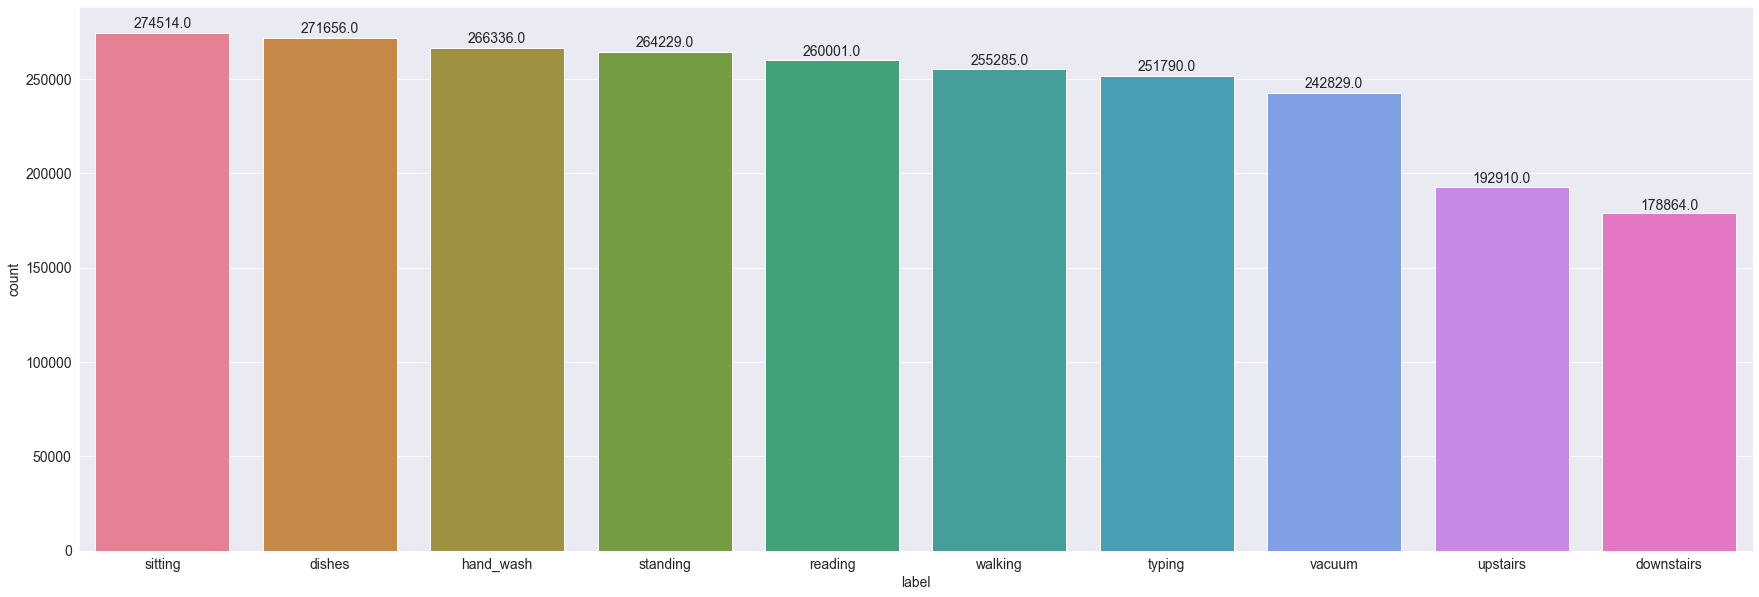

In [3]:
ax = sns.countplot(x="label", data=All_datasets, palette="husl", order=All_datasets['label'].value_counts().index)
show_values(ax)

## Encoding labels and participants name to pass the dataset into the ML algorithm

In [4]:
encoder = LabelEncoder()
All_datasets['encoded_label'] = encoder.fit_transform(All_datasets['label'])
# to know which code belong to which label
display(All_datasets['label'].value_counts())
display(All_datasets['encoded_label'].value_counts())
display(All_datasets.label.unique())

sitting       274514
dishes        271656
hand_wash     266336
standing      264229
reading       260001
walking       255285
typing        251790
vacuum        242829
upstairs      192910
downstairs    178864
Name: label, dtype: int64

4    274514
0    271656
2    266336
5    264229
3    260001
9    255285
6    251790
8    242829
7    192910
1    178864
Name: encoded_label, dtype: int64

array(['sitting', 'standing', 'walking', 'downstairs', 'upstairs',
       'typing', 'reading', 'hand_wash', 'dishes', 'vacuum'], dtype=object)

In [5]:
All_datasets['Name_File'] = encoder.fit_transform(All_datasets['Name File'])
# to know which code belong to which label
display(All_datasets['Name File'].value_counts())
display(All_datasets['Name_File'].value_counts())
display(All_datasets.label.unique())

p2_phone_watch_sensorFusion.ctm     275496
p10_phone_watch_sensorFusion.ctm    267523
p4_phone_watch_sensorFusion.ctm     256769
p6_phone_watch_sensorFusion.ctm     245013
p8_phone_watch_sensorFusion.ctm     243625
p3_phone_watch_sensorFusion.ctm     239838
p7_phone_watch_sensorFusion.ctm     238620
p1_phone_watch_sensorFusion.ctm     236583
p5_phone_watch_sensorFusion.ctm     229342
p9_phone_watch_sensorFusion.ctm     225605
Name: Name File, dtype: int64

2    275496
0    267523
4    256769
6    245013
8    243625
3    239838
7    238620
1    236583
5    229342
9    225605
Name: Name_File, dtype: int64

array(['sitting', 'standing', 'walking', 'downstairs', 'upstairs',
       'typing', 'reading', 'hand_wash', 'dishes', 'vacuum'], dtype=object)

## Visualization of missing values counts for each feature

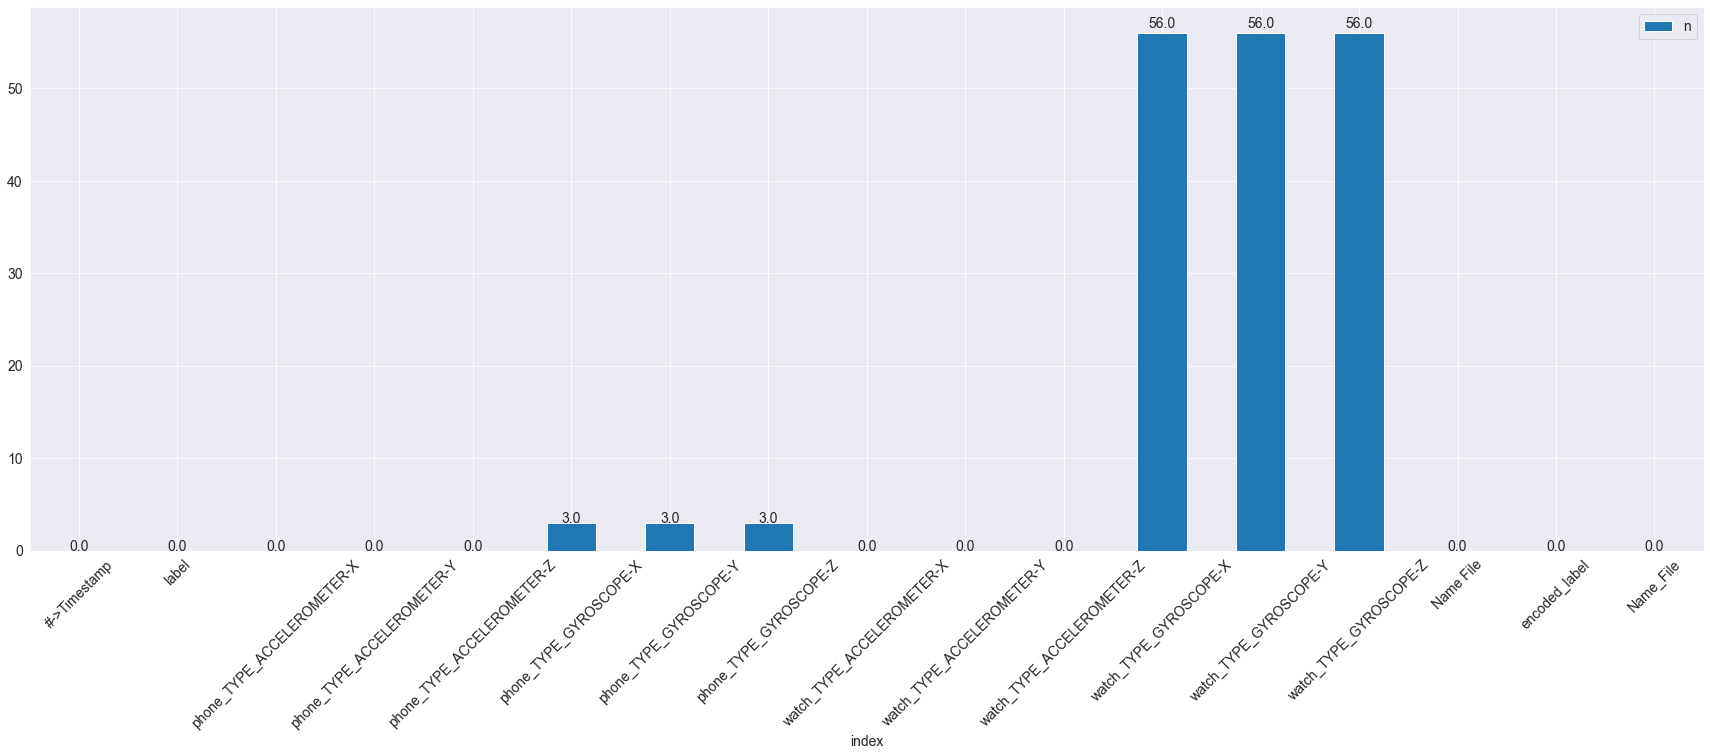

In [6]:
missing_values_count = All_datasets.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)
show_values(missing_values_count)

In [7]:
# delete the label column
All_datasets_Copy = All_datasets.copy()
All_datasets_Copy = All_datasets_Copy.drop(['label', 'Name File'], axis=1)

## Handling missing data (NaN) with the mean value

In [8]:
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Imputer.fit(All_datasets_Copy)
All_datasets_withoutNaN = Imputer.transform(All_datasets_Copy)

In [9]:
# adding column name to the respective columns and convert from numpy array to pandas dataframe due to imputer conversion
All_datasets_withoutNaN = pd.DataFrame(All_datasets_withoutNaN, columns=['#->Timestamp', 'phone_TYPE_ACCELEROMETER-X',
                                                                         'phone_TYPE_ACCELEROMETER-Y',
                                                                         'phone_TYPE_ACCELEROMETER-Z',
                                                                         'phone_TYPE_GYROSCOPE-X',
                                                                         'phone_TYPE_GYROSCOPE-Y',
                                                                         'phone_TYPE_GYROSCOPE-Z',
                                                                         'watch_TYPE_ACCELEROMETER-X',
                                                                         'watch_TYPE_ACCELEROMETER-Y',
                                                                         'watch_TYPE_ACCELEROMETER-Z',
                                                                         'watch_TYPE_GYROSCOPE-X',
                                                                         'watch_TYPE_GYROSCOPE-Y',
                                                                         'watch_TYPE_GYROSCOPE-Z', 'encoded_label',
                                                                         'Name_File'])
All_datasets_withoutNaN
# checking there is no NaN values
# All_datasets_withoutNaN.isna().sum()

,#->Timestamp,phone_TYPE_ACCELEROMETER-X,phone_TYPE_ACCELEROMETER-Y,phone_TYPE_ACCELEROMETER-Z,phone_TYPE_GYROSCOPE-X,phone_TYPE_GYROSCOPE-Y,phone_TYPE_GYROSCOPE-Z,watch_TYPE_ACCELEROMETER-X,watch_TYPE_ACCELEROMETER-Y,watch_TYPE_ACCELEROMETER-Z,watch_TYPE_GYROSCOPE-X,watch_TYPE_GYROSCOPE-Y,watch_TYPE_GYROSCOPE-Z,encoded_label,Name_File
0,0.351,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.896305,1.440971,-0.191763,-0.031960,0.106535,4.0,0.0
1,0.352,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.886730,1.421822,-0.191763,-0.031960,0.106535,4.0,0.0
2,0.353,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.004874,-2.953752,1.440971,-0.191763,-0.031960,0.106535,4.0,0.0
3,0.354,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.995299,-2.934603,1.498419,-0.191763,-0.031960,0.106535,4.0,0.0
4,0.355,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.985725,-2.905879,1.536717,-0.191763,-0.031960,0.106535,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458409,3189.781,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.081471,-1.996296,1.383524,-0.167792,0.125179,-0.295634,8.0,9.0
2458410,3189.782,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.225089,-1.785656,1.326077,-0.167792,0.125179,-0.295634,8.0,9.0
2458411,3189.783,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.502751,-1.737783,1.402673,-0.167792,0.125179,-0.295634,8.0,9.0
2458412,3189.784,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.560199,-1.785656,1.335651,-0.167792,0.125179,-0.295634,8.0,9.0


### convert encoded_label column from float to string to classify the labels and visualize them

In [10]:
All_datasets_withoutNaN['encoded_label'] = All_datasets_withoutNaN['encoded_label'].astype(str)
# filtering sensor data for specific activities
sitting = All_datasets_withoutNaN.query('encoded_label == "4.0"')
standing = All_datasets_withoutNaN.query('encoded_label in ["5.0"]')
walking = All_datasets_withoutNaN.query('encoded_label == "9.0"')
downstairs = All_datasets_withoutNaN.query('encoded_label == "1.0"')
upstairs = All_datasets_withoutNaN.query('encoded_label == "7.0"')
typing = All_datasets_withoutNaN.query('encoded_label == "6.0"')
reading = All_datasets_withoutNaN.query('encoded_label == "3.0"')
hand_wash = All_datasets_withoutNaN.query('encoded_label == "2.0"')
dishes = All_datasets_withoutNaN.query('encoded_label == "0.0"')
vacuum = All_datasets_withoutNaN.query('encoded_label == "8.0"')
All_datasets_withoutNaN.dtypes

#->Timestamp                  float64
phone_TYPE_ACCELEROMETER-X    float64
phone_TYPE_ACCELEROMETER-Y    float64
phone_TYPE_ACCELEROMETER-Z    float64
phone_TYPE_GYROSCOPE-X        float64
phone_TYPE_GYROSCOPE-Y        float64
phone_TYPE_GYROSCOPE-Z        float64
watch_TYPE_ACCELEROMETER-X    float64
watch_TYPE_ACCELEROMETER-Y    float64
watch_TYPE_ACCELEROMETER-Z    float64
watch_TYPE_GYROSCOPE-X        float64
watch_TYPE_GYROSCOPE-Y        float64
watch_TYPE_GYROSCOPE-Z        float64
encoded_label                  object
Name_File                     float64
dtype: object

In [11]:
All_datasets_withoutNaN['Name_File'] = All_datasets_withoutNaN['Name_File'].astype(str)
# filtering sensor data for specific activities
p_1 = All_datasets_withoutNaN.query('Name_File == "1.0"')
p_2 = All_datasets_withoutNaN.query('Name_File in ["2.0"]')
p_3 = All_datasets_withoutNaN.query('Name_File == "3.0"')
p_4 = All_datasets_withoutNaN.query('Name_File == "4.0"')
p_5 = All_datasets_withoutNaN.query('Name_File == "5.0"')
p_6 = All_datasets_withoutNaN.query('Name_File == "6.0"')
p_7 = All_datasets_withoutNaN.query('Name_File == "7.0"')
p_8 = All_datasets_withoutNaN.query('Name_File == "8.0"')
p_9 = All_datasets_withoutNaN.query('Name_File == "9.0"')
p_10 = All_datasets_withoutNaN.query('Name_File == "0.0"')
All_datasets_withoutNaN.dtypes

#->Timestamp                  float64
phone_TYPE_ACCELEROMETER-X    float64
phone_TYPE_ACCELEROMETER-Y    float64
phone_TYPE_ACCELEROMETER-Z    float64
phone_TYPE_GYROSCOPE-X        float64
phone_TYPE_GYROSCOPE-Y        float64
phone_TYPE_GYROSCOPE-Z        float64
watch_TYPE_ACCELEROMETER-X    float64
watch_TYPE_ACCELEROMETER-Y    float64
watch_TYPE_ACCELEROMETER-Z    float64
watch_TYPE_GYROSCOPE-X        float64
watch_TYPE_GYROSCOPE-Y        float64
watch_TYPE_GYROSCOPE-Z        float64
encoded_label                  object
Name_File                      object
dtype: object

In [12]:
# All_datasets_withoutNaN drop timestamp column
withoutTS = All_datasets_withoutNaN.drop(['#->Timestamp', 'Name_File'], axis=1)

## Analyzing Accelerometer Signal

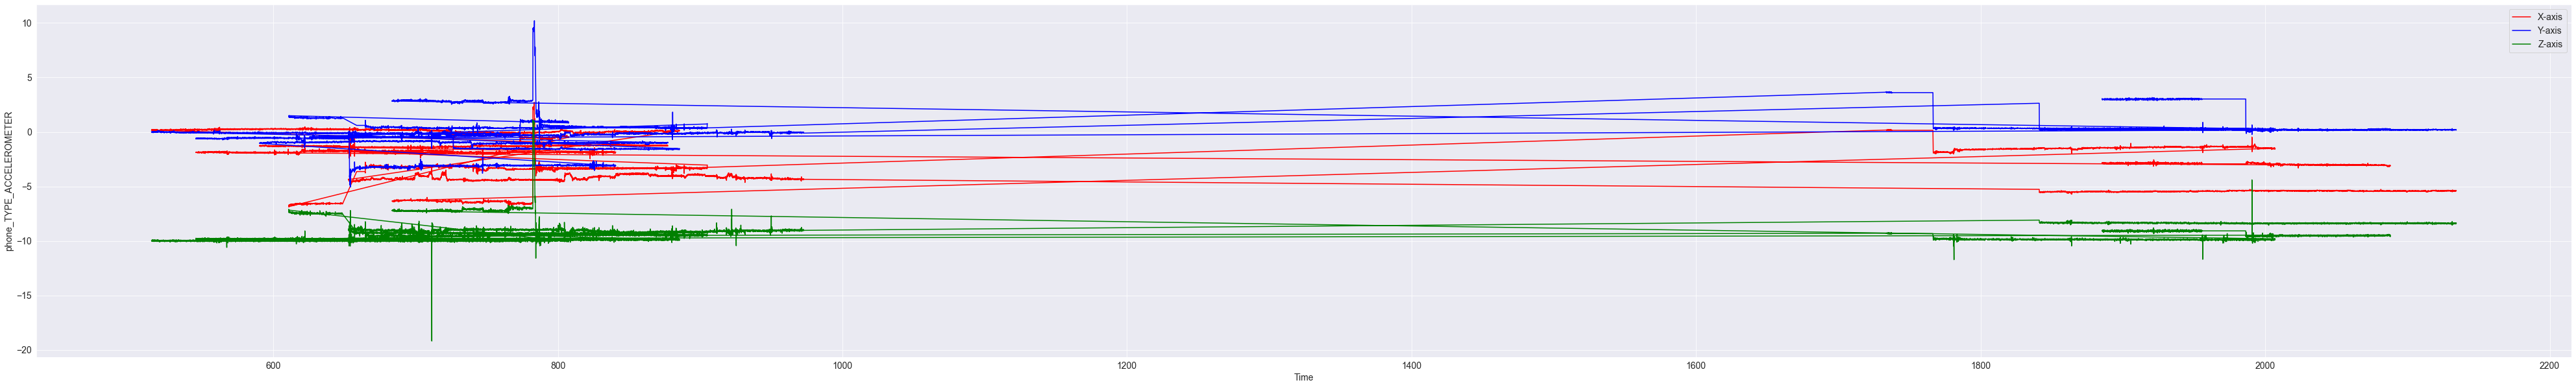

In [14]:
plotting_ACC(reading, "phone_TYPE_ACCELEROMETER")
# activity_list = [sitting, standing, walking, downstairs, upstairs, typing, reading, hand_wash, dishes,vacuum]
# for i in range(len(activity_list)):
#     plotting_GYRO(activity_list[i], "phone_TYPE_GYROSCOPE")

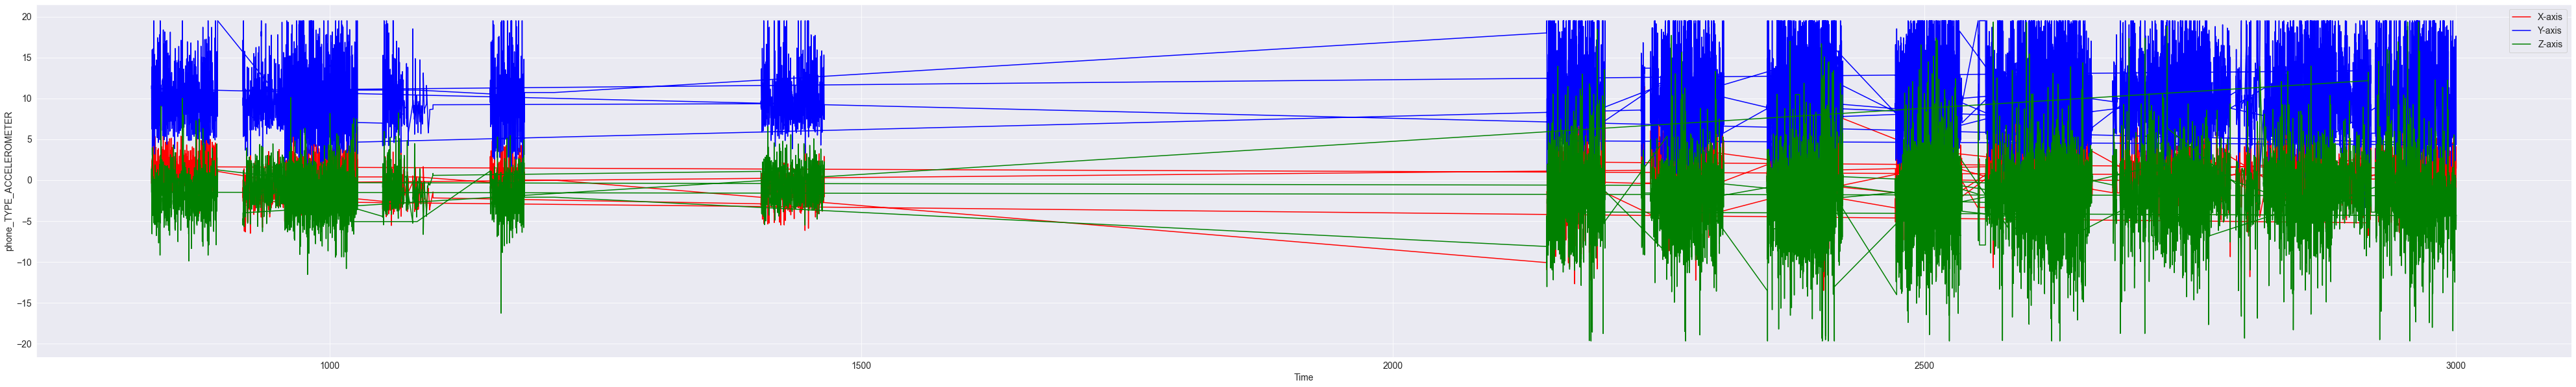

In [15]:
plotting_ACC(downstairs, "phone_TYPE_ACCELEROMETER")

## Analyzing Gyroscope Signal

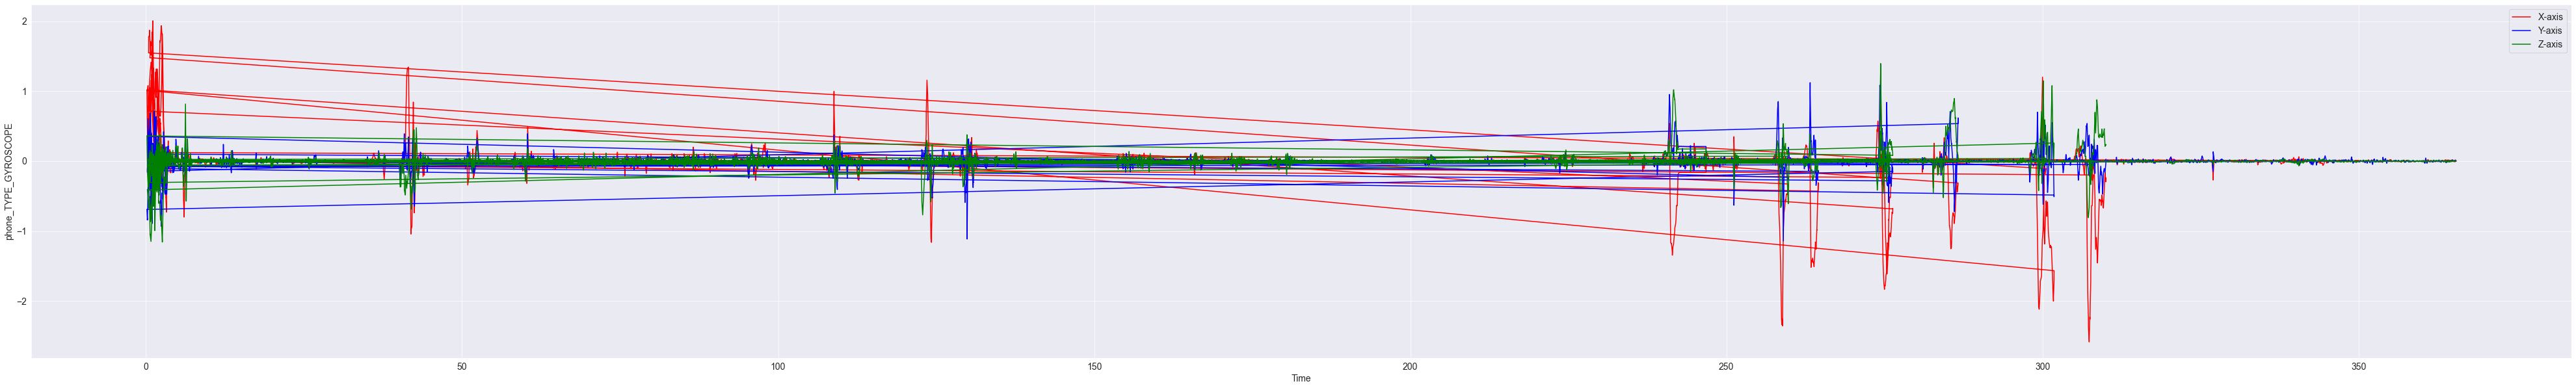

In [15]:
plotting_GYRO(sitting, "phone_TYPE_GYROSCOPE")

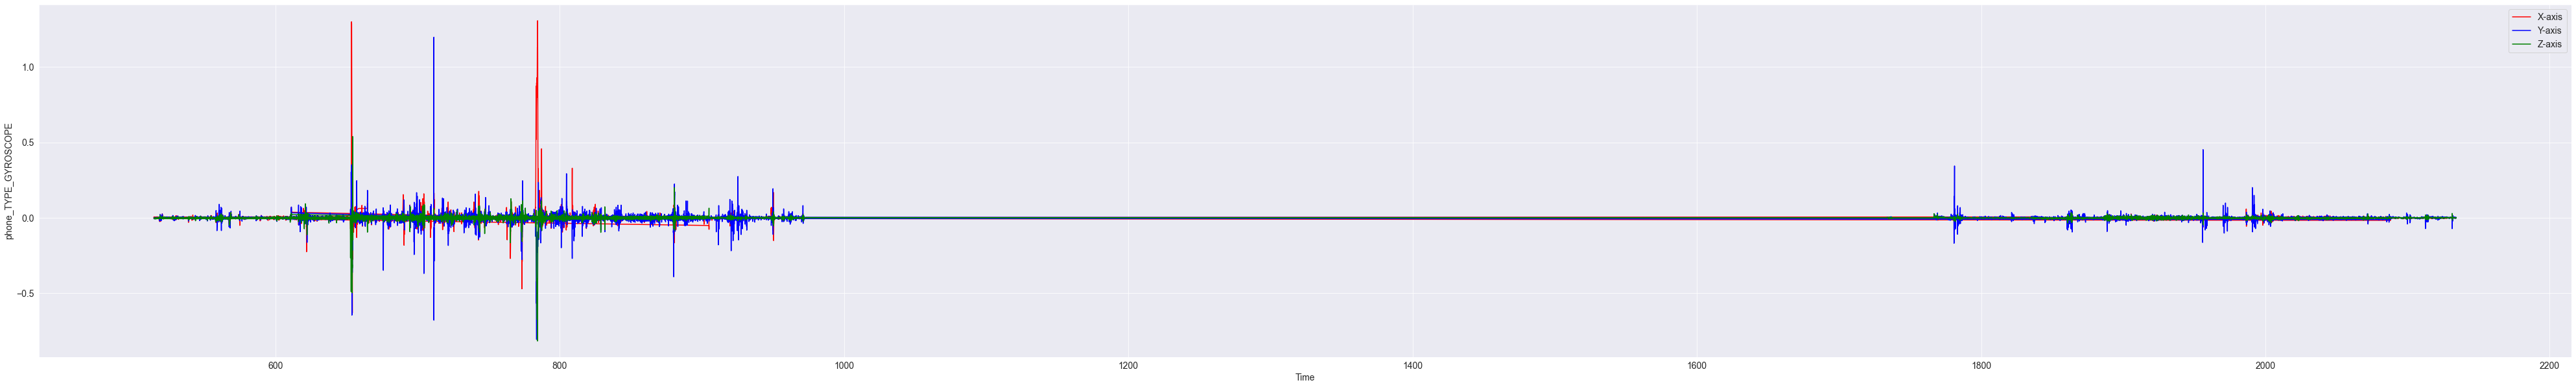

In [17]:
plotting_GYRO(reading, "phone_TYPE_GYROSCOPE")

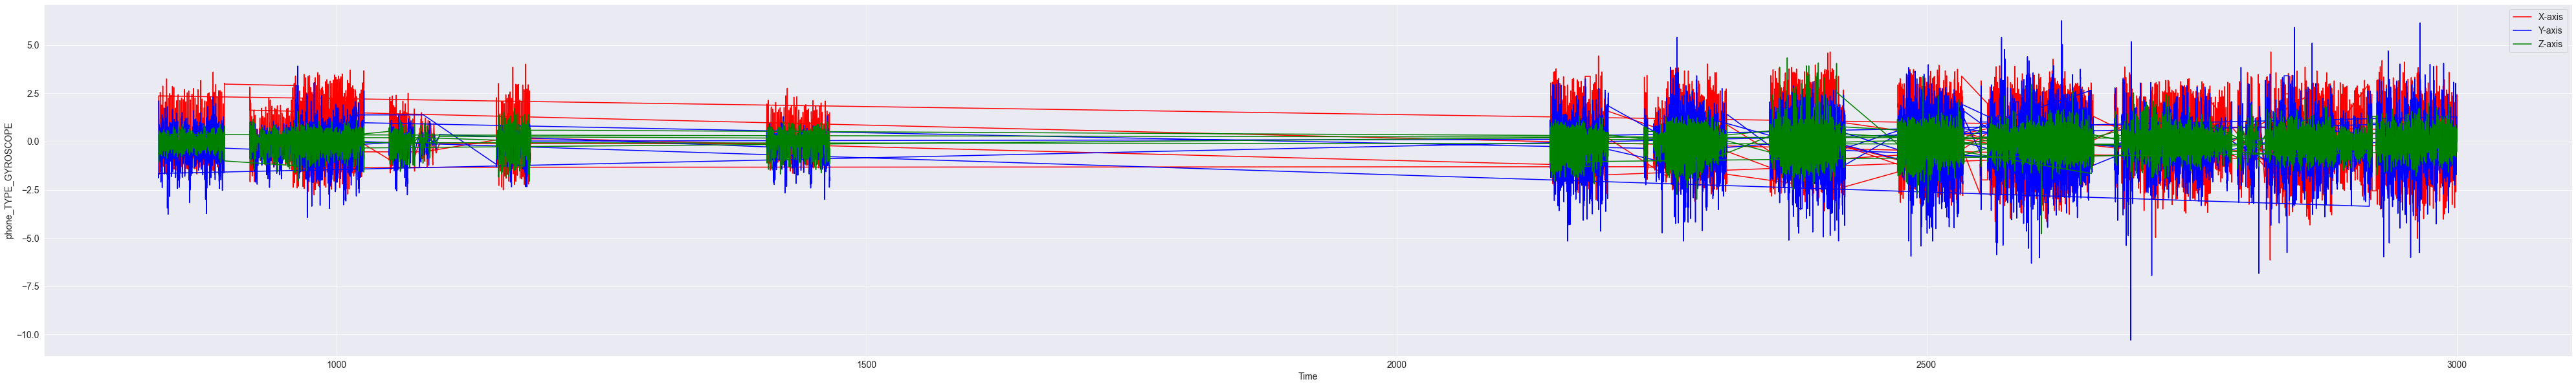

In [16]:
plotting_GYRO(downstairs, "phone_TYPE_GYROSCOPE")

### Descriptive statistics

,phone_TYPE_ACCELEROMETER-X,phone_TYPE_ACCELEROMETER-Y,phone_TYPE_ACCELEROMETER-Z,phone_TYPE_GYROSCOPE-X,phone_TYPE_GYROSCOPE-Y,phone_TYPE_GYROSCOPE-Z,watch_TYPE_ACCELEROMETER-X,watch_TYPE_ACCELEROMETER-Y,watch_TYPE_ACCELEROMETER-Z,watch_TYPE_GYROSCOPE-X,watch_TYPE_GYROSCOPE-Y,watch_TYPE_GYROSCOPE-Z
count,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06
mean,-1.872269e-01,6.689228e+00,-3.575645e+00,-5.471611e-05,-4.071512e-03,-1.164186e-02,-4.749332e+00,-4.222643e+00,2.610945e+00,-1.050597e-03,-7.943137e-03,9.765179e-05
std,2.493637e+00,4.470899e+00,4.347110e+00,7.254871e-01,6.076788e-01,3.088052e-01,4.452643e+00,2.828450e+00,4.820425e+00,1.007364e+00,4.124490e-01,5.655100e-01
min,-1.887924e+01,-9.846176e+00,-1.965982e+01,-6.142456e+00,-1.090793e+01,-4.772308e+00,-1.960391e+01,-1.959434e+01,-1.960391e+01,-1.974092e+01,-8.733198e+00,-6.477322e+00
25%,-1.486649e+00,2.646439e+00,-8.794903e+00,-1.768494e-02,-3.533936e-02,-7.598877e-03,-8.526146e+00,-6.065484e+00,-2.633004e-01,-1.571390e-01,-9.055467e-02,-9.321804e-02
50%,1.410370e-01,9.121925e+00,-1.978180e+00,7.629395e-05,-1.373291e-04,-3.051758e-05,-4.648449e+00,-3.719717e+00,1.766506e+00,0.000000e+00,-2.663373e-03,0.000000e+00
75%,1.517487e+00,9.642166e+00,-3.683090e-02,1.081848e-02,2.772522e-02,1.116943e-02,-7.899013e-01,-2.264384e+00,7.808054e+00,1.624657e-01,8.256455e-02,8.789130e-02
max,1.944449e+01,1.950000e+01,1.933958e+01,5.044723e+00,8.608276e+00,4.716293e+00,1.959434e+01,1.960391e+01,1.959434e+01,3.204836e+01,5.289458e+00,8.631990e+00


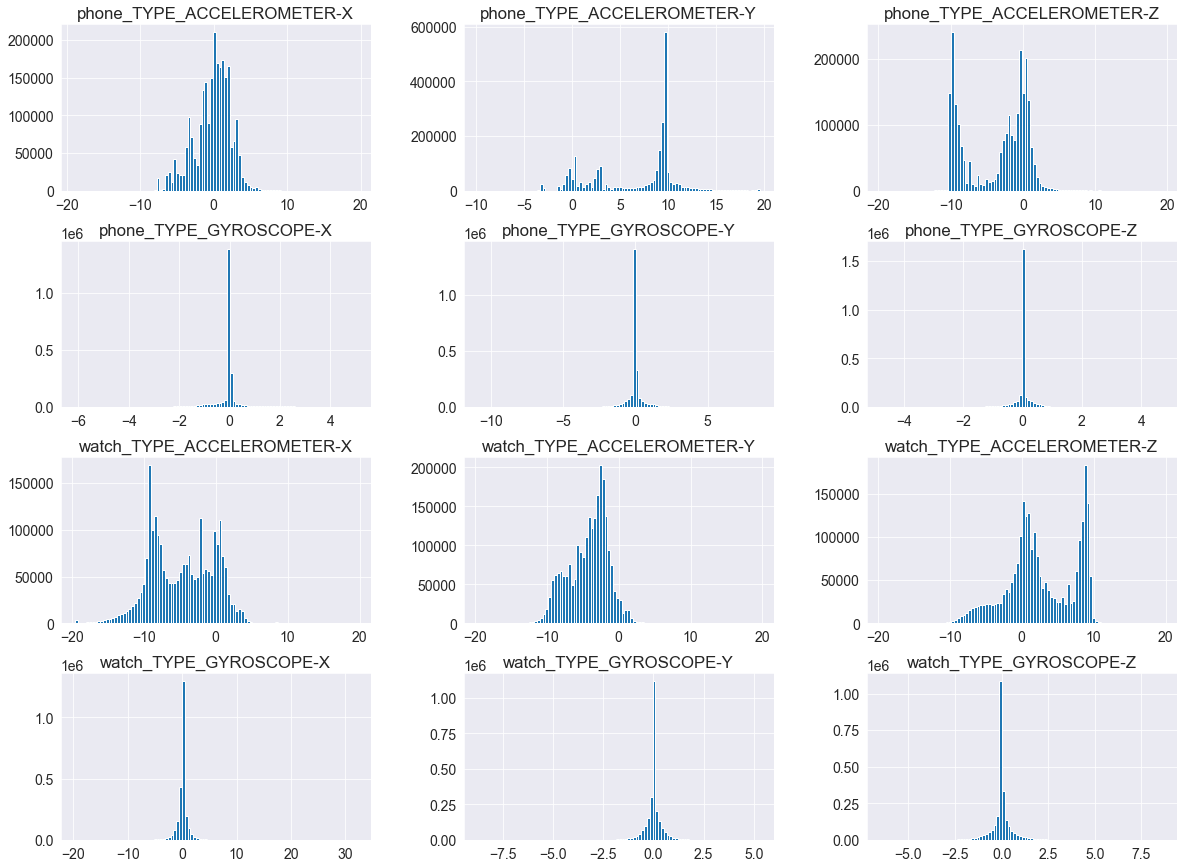

In [16]:
## data distribution before removing outliers
data_distribution_before = withoutTS.hist(bins=100, figsize=(20, 15))
withoutTS.describe()

## apply sliding window and feature extraction

In [17]:
withoutLabelDF = withoutTS.iloc[:, :-1]

In [18]:
target_names = ['sitting', 'standing', 'walking', 'downstairs', 'upstairs', 'typing', 'reading', 'hand_wash', 'dishes',
                'vacuum']

In [19]:
def evaluate(window_size, overlap, feature_sets):
    segments = withoutLabelDF.rolling(window=window_size, center=True, min_periods=window_size).agg(feature_sets)
    segments.columns = ['-'.join(tup).rstrip('-') for tup in segments.columns.values]
    segments = pd.concat([withoutTS.iloc[:, -1], segments], axis=1)
    segments = segments.dropna()
    # segments = segments[::(int)(window_size * overlap)]
    percentage = (int)((window_size)-(window_size * overlap))
    segments = segments[::percentage]
    features_df = segments
    # display(features_df)
    # selecting the data and the labels which is the last column
    X = features_df.iloc[:, 1:].values
    y = features_df.iloc[:, :1].values
    #standardization
    sc = StandardScaler()
    X = sc.fit_transform(X)
    #create GNB model
    classifier = GaussianNB()
    kfold = StratifiedKFold(n_splits=10)
    # pass your model and KFold object to cross_val_score
    cv_score = cross_val_score(classifier, X, y.ravel(), cv=kfold)
    # Model performance
    print("Accuracy: {:.2f} %".format(cv_score.mean() * 100))
    print("Standard Deviation: {:.2f} %".format(cv_score.std() * 100))
    y_pred = cross_val_predict(classifier, X, y.ravel(), cv=10)
    report = classification_report(y, y_pred, target_names=target_names, digits=4, output_dict=True)
    df = pd.DataFrame(report).transpose()
    # df.to_csv('C:\\Users\Amer\Desktop\dddd.csv')
    output_filepath = "C:\\Users\Amer\Desktop\ "
    df.to_csv(output_filepath + "WS " + str(window_size) + " OL " + str(overlap) + " FS " + str(feature_sets) + ".csv")

In [20]:
evaluate(500, 0.5, ['min', 'max', 'sum', 'mean', 'std'])

Accuracy: 69.96 %
Standard Deviation: 7.20 %


In [ ]:
# Testing
window_sizes = [100, 500]
overlaps = [0.5]
feature_sets = [["mean", "std"]]

In [20]:
# Calculate the processing time
import time
start = time.time()
# 100ms, 0.5s, 1s, 2s, 3s, 4s, 5s, 10s, 12s, 20s
# 5, 25, 50, 100, 150, 200, 250, 500, 600, 1000
window_sizes = [600]
overlaps = [0.25, 0.5, 0.75, 0.99]
sampling_rates = [5, 10, 25, 35]
feature_sets = [["mean", "std"], ['min', 'max', 'sum', 'mean', 'std']]
# training_participants = ["p_1", "p_2"]
# testing_participants = ["p_3", "p_4"]

for window in window_sizes:
    for overlap in overlaps:
        for feature_set in feature_sets:
            print("window_size:", window,",overlap:", overlap, ",feature_set:", feature_set)
            evaluate(window, overlap, feature_set)

end = time.time()
print(end - start)

window_size: 600 ,overlap: 0.25 ,feature_set: ['mean', 'std']
Accuracy: 68.73 %
Standard Deviation: 7.25 %
window_size: 600 ,overlap: 0.25 ,feature_set: ['min', 'max', 'sum', 'mean', 'std']
Accuracy: 70.20 %
Standard Deviation: 7.02 %
window_size: 600 ,overlap: 0.5 ,feature_set: ['mean', 'std']
Accuracy: 70.00 %
Standard Deviation: 7.33 %
window_size: 600 ,overlap: 0.5 ,feature_set: ['min', 'max', 'sum', 'mean', 'std']
Accuracy: 70.30 %
Standard Deviation: 7.55 %
window_size: 600 ,overlap: 0.75 ,feature_set: ['mean', 'std']
Accuracy: 70.17 %
Standard Deviation: 7.25 %
window_size: 600 ,overlap: 0.75 ,feature_set: ['min', 'max', 'sum', 'mean', 'std']
Accuracy: 70.54 %
Standard Deviation: 7.45 %
window_size: 600 ,overlap: 0.99 ,feature_set: ['mean', 'std']
Accuracy: 70.14 %
Standard Deviation: 7.13 %
window_size: 600 ,overlap: 0.99 ,feature_set: ['min', 'max', 'sum', 'mean', 'std']
Accuracy: 70.84 %
Standard Deviation: 7.43 %
301.24678325653076


## Visualize the confusion matrix for the best model's parameters

In [46]:
def rollit(window_size, overlap, feature_sets):
    segments = withoutLabelDF.rolling(window=window_size, center=True, min_periods=window_size).agg(feature_sets)
    segments.columns = ['-'.join(tup).rstrip('-') for tup in segments.columns.values]
    segments = pd.concat([withoutTS.iloc[:, -1], segments], axis=1)
    segments = segments.dropna()
    percentage = (int)((window_size)-(window_size * overlap))
    segments = segments[::percentage]
    return segments

Accuracy: 72.50 %
Standard Deviation: 6.77 %
              precision    recall  f1-score   support

     sitting     0.7037    0.8075    0.7520      5434
    standing     0.8242    0.8275    0.8259      3582
     walking     0.7148    0.6096    0.6580      5325
  downstairs     0.4391    0.9112    0.5926      5202
    upstairs     0.8442    0.6396    0.7278      5438
      typing     0.9599    0.8744    0.9151      5285
     reading     0.9081    0.1217    0.2147      5036
   hand_wash     0.7181    0.8239    0.7674      3856
      dishes     0.8174    0.8598    0.8380      4806
      vacuum     0.8758    0.8257    0.8500      5105

    accuracy                         0.7250     49069
   macro avg     0.7805    0.7301    0.7141     49069
weighted avg     0.7800    0.7250    0.7099     49069



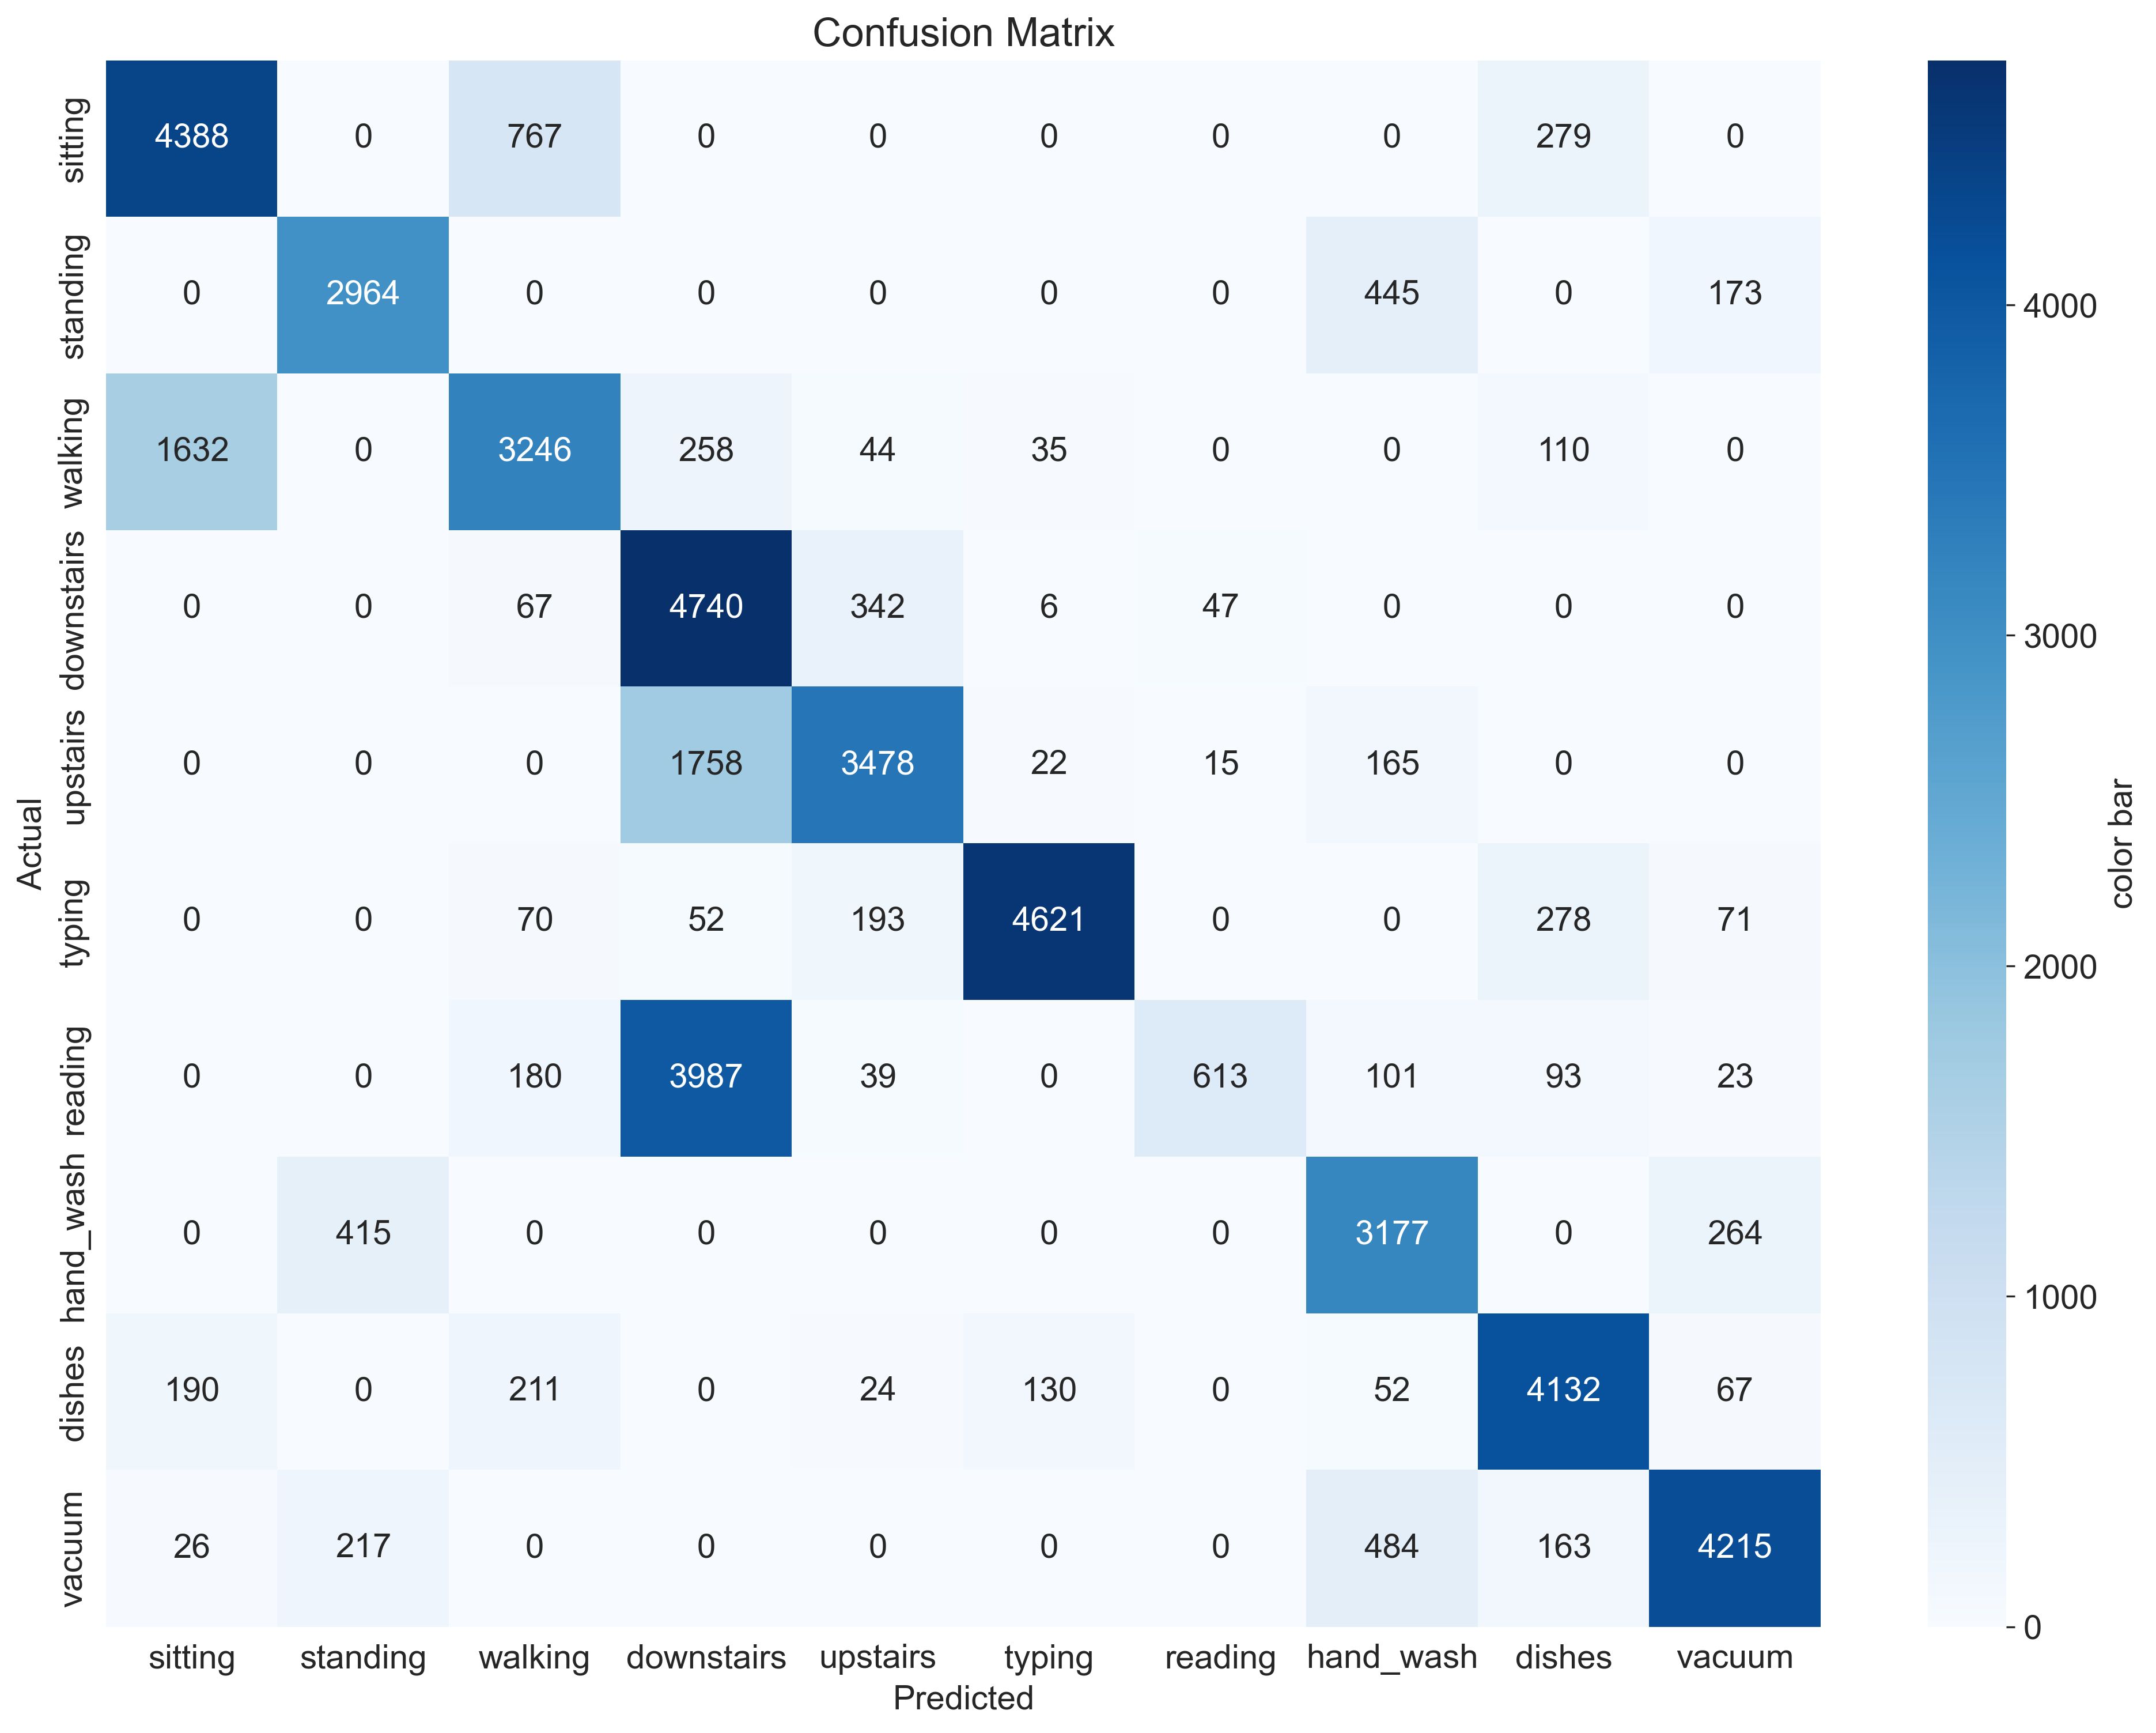

In [47]:
features_df = rollit(5000, 0.99, ['min', 'max', 'sum', 'mean', 'std'])
# display(features_df)
# selecting the data and the labels which is the last column
X = features_df.iloc[:, 1:].values
y = features_df.iloc[:, :1].values
# standarization or normalization
sc = StandardScaler()
X = sc.fit_transform(X)
classifier = GaussianNB()
# create a splitter object
kfold = StratifiedKFold(n_splits=10)
cv_score = cross_val_score(classifier, X, y.ravel(), cv=kfold)
# Model performance
print("Accuracy: {:.2f} %".format(cv_score.mean() * 100))
print("Standard Deviation: {:.2f} %".format(cv_score.std() * 100))
y_pred = cross_val_predict(classifier, X, y.ravel(), cv=10)
print(classification_report(y, y_pred, target_names=target_names, digits=4))
accuracy_score(y, y_pred)

from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=300)
# y_pred = classifier.predict(X)
cm = confusion_matrix(y, y_pred)
# accuracy_score(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)
# --- ---- ---- heatmap
# correct the orders of label categories (double check)
sns.heatmap(cm, cmap="Blues", annot=True,
            cbar_kws={"orientation": "vertical", "label": "color bar"},
            xticklabels=['sitting', 'standing', 'walking', 'downstairs', 'upstairs', 'typing', 'reading', 'hand_wash',
                         'dishes', 'vacuum'],
            yticklabels=['sitting', 'standing', 'walking', 'downstairs', 'upstairs', 'typing', 'reading', 'hand_wash',
                         'dishes', 'vacuum'], fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Test for subject cross validation

In [24]:
withoutT = All_datasets_withoutNaN.drop(['#->Timestamp'], axis=1)
withoutLabelD = withoutT.iloc[:, :-2]
withoutLabelD

,phone_TYPE_ACCELEROMETER-X,phone_TYPE_ACCELEROMETER-Y,phone_TYPE_ACCELEROMETER-Z,phone_TYPE_GYROSCOPE-X,phone_TYPE_GYROSCOPE-Y,phone_TYPE_GYROSCOPE-Z,watch_TYPE_ACCELEROMETER-X,watch_TYPE_ACCELEROMETER-Y,watch_TYPE_ACCELEROMETER-Z,watch_TYPE_GYROSCOPE-X,watch_TYPE_GYROSCOPE-Y,watch_TYPE_GYROSCOPE-Z
0,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.896305,1.440971,-0.191763,-0.031960,0.106535
1,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.886730,1.421822,-0.191763,-0.031960,0.106535
2,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.004874,-2.953752,1.440971,-0.191763,-0.031960,0.106535
3,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.995299,-2.934603,1.498419,-0.191763,-0.031960,0.106535
4,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.985725,-2.905879,1.536717,-0.191763,-0.031960,0.106535
...,...,...,...,...,...,...,...,...,...,...,...,...
2458409,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.081471,-1.996296,1.383524,-0.167792,0.125179,-0.295634
2458410,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.225089,-1.785656,1.326077,-0.167792,0.125179,-0.295634
2458411,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.502751,-1.737783,1.402673,-0.167792,0.125179,-0.295634
2458412,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.560199,-1.785656,1.335651,-0.167792,0.125179,-0.295634


In [25]:
def rollit(window_size, overlap, feature_sets):
    segments = withoutLabelD.rolling(window=window_size, center=True, min_periods=window_size).agg(feature_sets)
    segments.columns = ['-'.join(tup).rstrip('-') for tup in segments.columns.values]
    segments = pd.concat([withoutT.iloc[:, -2:], segments], axis=1)
    segments = segments.dropna()
    # new two lines and comment the old one
    # segments = segments[::(int)(window_size * overlap)]
    percentage = (int)((window_size)-(window_size * overlap))
    segments = segments[::percentage]
    return segments

In [26]:
features_df = rollit(5000, 0.99, ['min', 'max', 'sum', 'mean', 'std'])
features_df

,encoded_label,Name_File,phone_TYPE_ACCELEROMETER-X-min,phone_TYPE_ACCELEROMETER-X-max,phone_TYPE_ACCELEROMETER-X-sum,phone_TYPE_ACCELEROMETER-X-mean,phone_TYPE_ACCELEROMETER-X-std,phone_TYPE_ACCELEROMETER-Y-min,phone_TYPE_ACCELEROMETER-Y-max,phone_TYPE_ACCELEROMETER-Y-sum,...,watch_TYPE_GYROSCOPE-Y-min,watch_TYPE_GYROSCOPE-Y-max,watch_TYPE_GYROSCOPE-Y-sum,watch_TYPE_GYROSCOPE-Y-mean,watch_TYPE_GYROSCOPE-Y-std,watch_TYPE_GYROSCOPE-Z-min,watch_TYPE_GYROSCOPE-Z-max,watch_TYPE_GYROSCOPE-Z-sum,watch_TYPE_GYROSCOPE-Z-mean,watch_TYPE_GYROSCOPE-Z-std
250,4.0,0.0,-1.613678,1.718857,-384.885483,-0.769771,0.877973,-0.333313,9.826767,921.115774,...,-0.878913,0.354229,-35.598636,-0.071197,0.235839,-0.924190,0.183773,-75.386760,-0.150774,0.328573
625,4.0,0.0,-1.325088,-1.197784,-634.491058,-1.268982,0.021622,-0.339157,-0.187592,-135.676071,...,-0.010653,0.005327,-1.376964,-0.002754,0.003890,-0.005327,0.002663,-0.290308,-0.000581,0.001560
1000,4.0,0.0,-1.325088,-1.189468,-631.202531,-1.262405,0.022534,-0.369965,-0.254074,-157.130493,...,-0.013317,0.005327,-1.089319,-0.002179,0.003714,-0.005327,0.002663,0.053267,0.000107,0.001596
1375,4.0,0.0,-1.333130,-1.189468,-630.323031,-1.260646,0.023955,-0.393219,-0.256119,-167.383102,...,-0.007990,0.005327,-0.553982,-0.001108,0.003475,-0.005327,0.005327,0.154476,0.000309,0.001920
1750,4.0,0.0,-1.307083,-1.207245,-630.909912,-1.261820,0.018897,-0.424973,-0.299744,-181.580261,...,-0.007990,0.002663,-0.940171,-0.001880,0.002512,-0.005327,0.002663,-0.154476,-0.000309,0.001523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456500,8.0,9.0,-1.682343,1.947754,-167.263488,-0.334527,0.837029,8.065521,11.519470,4876.460509,...,-0.548655,0.514031,0.287644,0.000575,0.283190,-0.972131,0.487397,-29.009453,-0.058019,0.331668
2456875,8.0,9.0,-1.703995,0.621109,-194.323167,-0.388646,0.600590,7.835129,14.447907,4888.029799,...,-0.495387,0.399506,-40.906740,-0.081813,0.228016,-0.972131,0.532675,0.775042,0.001550,0.339421
2457250,8.0,9.0,-0.791824,0.695480,1.966034,0.003932,0.336890,9.193619,10.229477,4873.126160,...,-0.649863,0.625892,-16.195969,-0.032392,0.279329,-1.126607,0.759061,32.067006,0.064134,0.386004
2457625,8.0,9.0,-1.489288,0.746826,-62.991745,-0.125983,0.526709,8.758347,10.330490,4828.005269,...,-1.049369,1.211834,22.841082,0.045682,0.380052,-1.126607,1.217161,31.009648,0.062019,0.545123


In [28]:
# selecting the data and the labels which is the last column
X = features_df.iloc[:, 2:].values
y = features_df.iloc[:, :1].values
Group = features_df.iloc[:, 1].values

# standarization or normalization
sc = StandardScaler()
X = sc.fit_transform(X)

In [29]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
# Create  classifier object.
classifier = GaussianNB()

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    classifier.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(classifier.score(x_test_fold, y_test_fold))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

List of possible accuracy: [0.739329268292683, 0.7652439024390244, 0.7591463414634146, 0.7332317073170732, 0.7317073170731707, 0.7358778625954199, 0.7419847328244275, 0.7648854961832061, 0.6793893129770993, 0.7587786259541984]

Maximum Accuracy That can be obtained from this model is: 76.52439024390245 %

Minimum Accuracy: 67.93893129770993 %

Overall Accuracy: 74.09574567119716 %

Standard Deviation is: 0.025333792322132002


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
